# Statistics: The Science of Decisions Project

**Question 1**: What is our independent variable? What is our dependent variable?

**Answer**: **Word condtion** is our independent variable i.e. **congruent** or **incongruent **. **Time taken** to name the ink color is our dependent variable.

**Question 2**: What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Answer**:

**Hypothesis**:

- H<sub>0</sub>: $\mu_c = \mu_i$ (average time taken for congruent word is equal to average time taken for incongruent word)
- H<sub>a</sub>: $\mu_c \neq \mu_i$ (average time taken for congruent word is not equal to average time taken for incongruent word)


We can perform `t test` on data because only sample data are available.

![population.gif](population.gif "Population")

In `t test` we don't have any information available about population but we want to make inference about population based on sample data available. e.g.  We want to know the election outcome in India. We can't conduct a survey on whole population. So we conduct survey on some random people across demographics, religion, caste, sex and age. Now this data acts as a sample as we didn't conduct survey on whole population. Based on this we want to make inference about the whole population i.e. who is going to win.

Here we have data from a stroop task conducted on some people and we are trying to make inference whether there is a difference between congruent means and incongruent means or not.

- This is an example of dependent sample because same set of people same set of people go through congruent and incongruent words.
- We can perform the above the hypothesis testing (null and alternate) on the sample available and either reject the null or fail to reject the null.


- The hypothesis testing for the sample for this stroop task is perofrmed in answer to **Question 5**. As we can see the probablity for the t value is quite low which is statistically significant. Hence we can reject $H_0$.
- We can make inference about population that It's highly unlikely that people in general will take same time for congruent and incongruent words.

In [144]:
import csv
from pprint import pprint
import math

stat = {'Congruent': { 'data': [] }, 'Incongruent': { 'data': [] }, 'Difference': { 'data': [] }}

with open('./stroopdata.csv', 'r') as st_data:
    reader = csv.DictReader(st_data)    
    for row in reader:
        cong = float(row['Congruent'])
        incong = float(row['Incongruent'])
        diff = cong-incong
        
        stat['Congruent']['data'].append(cong)
        stat['Incongruent']['data'].append(incong)
        stat['Difference']['data'].append(diff)

for k in stat:
    print(k + ": ")
    pprint(stat[k]['data'])

Congruent: 
[12.079,
 16.791,
 9.564,
 8.63,
 14.669,
 12.238,
 14.692,
 8.987,
 9.401,
 14.48,
 22.328,
 15.298,
 15.073,
 16.929,
 18.2,
 12.13,
 18.495,
 10.639,
 11.344,
 12.369,
 12.944,
 14.233,
 19.71,
 16.004]
Incongruent: 
[19.278,
 18.741,
 21.214,
 15.687,
 22.803,
 20.878,
 24.572,
 17.394,
 20.762,
 26.282,
 24.524,
 18.644,
 17.51,
 20.33,
 35.255,
 22.158,
 25.139,
 20.429,
 17.425,
 34.288,
 23.894,
 17.96,
 22.058,
 21.157]
Difference: 
[-7.198999999999998,
 -1.9499999999999993,
 -11.649999999999999,
 -7.056999999999999,
 -8.134,
 -8.64,
 -9.879999999999999,
 -8.406999999999998,
 -11.361,
 -11.802,
 -2.1960000000000015,
 -3.3459999999999983,
 -2.437000000000001,
 -3.401,
 -17.055000000000003,
 -10.028,
 -6.643999999999998,
 -9.79,
 -6.081000000000001,
 -21.918999999999997,
 -10.949999999999998,
 -3.7270000000000003,
 -2.347999999999999,
 -5.152999999999999]


**Question 3**: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

**Answer**: Some descriptive statistics from the sample data is as follows:

|Data        |   Mean        | Median     | Variance      | Standard Deviation |
|:----------:|:-------------:|:----------:|:-------------:|:------------------:|
|Congruent   | 14.051        | 14.3565    |   12.669      |   3.559            |
|Incongruent | 22.016        | 21.0175    | 23.012        |   4.797            |
| Difference | -7.965        | -7.666     | 23.667        |   4.865            |

In [145]:
def variance(data):
    """
        This function returns variance of given sample data.
    """
    
    mean = sum(data)/len(data)
    squared_diff = 0
    
    for d in data:
        squared_diff += pow((d - mean), 2)
    
    return squared_diff/(len(data) - 1)
        
    

In [146]:

for k in stat:
    list_data = sorted(stat[k]['data'])
    count = len(list_data)
    mean = sum(list_data)/count
    median = list_data[int(count/2)]
    var = variance(list_data)
    std = math.sqrt(var)

    if count%2 == 0:
        median = (list_data[int(count/2)] + list_data[int(count/2 - 1) ])/2
        
    stat[k]['mean'] = mean
    stat[k]['median'] = median
    stat[k]['variance'] = var
    stat[k]['std'] = std
    
    print('\n' + k + ': ')
    print('Mean: ', mean)
    print('Median: ', median)
    print('Variance: ', var)
    print('Standard Deviation: ', std)
        


Congruent: 
Mean:  14.051124999999997
Median:  14.3565
Variance:  12.669029070652174
Standard Deviation:  3.559357957645195

Incongruent: 
Mean:  22.01591666666667
Median:  21.0175
Variance:  23.011757036231884
Standard Deviation:  4.797057122469138

Difference: 
Mean:  -7.964791666666667
Median:  -7.666499999999999
Variance:  23.66654086775362
Standard Deviation:  4.864826910359054


**Question 4**: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

**Answer**: Data is visualized below:

**Observations**:

- Distribution of diference looks like negatively skewed.
- The mode of difference is around -4 to -2.
- The mode of Congruent data is around 14 to 16.
- The mode od Incongruent data is around 20 to 22.


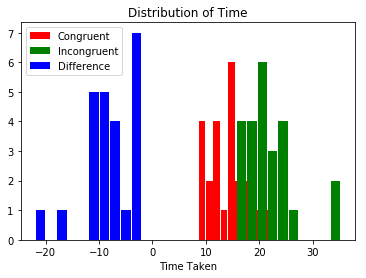

In [153]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

colors = {'Congruent': 'red', 'Incongruent': 'green', 'Difference':'blue'}

for k in stat:
    ax.hist(stat[k]['data'], color = colors[k], label=k, rwidth = 0.9)

legend = ax.legend(loc='upper left')
plt.title('Distribution of Time')
plt.xlabel('Time Taken')
plt.show()


**Question 5**: Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

**Answer**: 

- The `t` value after `t test` is `-8.021` which has a probablity of less than `0.0001`.
- Confidence Level is between `-9.667` and `-6.263` at $\alpha = 0.10$
- The value for t which is `-8.021` is statistically significant hence we reject the test.
- It's highly unlikely that average time taken for congruent and incongruent words would be same.
- Result seems as expected because time taken is significantly different.

In [156]:
list_d = stat['Difference']['data']
se = stat['Difference']['std']/math.sqrt(len(list_d))

t = (stat['Congruent']['mean'] - stat['Incongruent']['mean'])/se

print(se)
print(t)

0.9930286347783402
-8.020706944109966


**Question 6**: Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Answer**:

- I think this is human mind. We tend to remember word having same color as name more intutively compared to having different color.
- A simliar task would be:
    - Congruent: picture of an animal and name of animal written over it.
    - Incongruent: Picture of an animal and a different animal's name written over it.
- I beleive in case of incongruent words, time would be much more than in congruent words.

Resources Used:

- [Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)
- [Python Doc](https://docs.python.org/3/library/index.html)
- [GraphPad](https://www.graphpad.com/quickcalcs/distMenu/)
- [PennState](https://onlinecourses.science.psu.edu/stat414/node/18)
- Previous Project (Bikeshare Analysis)